In [1]:
import pickle
import numpy as np
import torch
from matplotlib import pyplot as plt


Load data

In [2]:
step = 130
save_dir = "message_data/"

# most recent position
pkl_file = open(f"{save_dir}"+f'most_recent_position-step{step}.pkl', 'rb')
most_recent_position = np.array(pickle.load(pkl_file))
# edge features before processed by message function
pkl_file = open(f"{save_dir}"+f'edge_features_unprocessed-step{step}.pkl', 'rb')
edge_features_unprocessed = np.array(pickle.load(pkl_file))
# edge feature after processed by message function
pkl_file = open(f"{save_dir}"+f'edge_features_processed-step{step}.pkl', 'rb')
edge_features_processed = np.array(pickle.load(pkl_file))
# connectivity indices
pkl_file = open(f"{save_dir}"+f'connectivity_indices-step{step}.pkl', 'rb')
connectivity_indices = pickle.load(pkl_file)
# # edge index
# pkl_file = open(f'edge_index-step{step}.pkl', 'rb')
# edge_index = pickle.load(pkl_file)

In [3]:
# Cut the raw data because of the memory capacity`
# cut = 50
# connectivity_indices = connectivity_indices[:cut]
# edge_features_nuprocessed = edge_features_unprocessed
# edge_features_processed = edge_features_processed

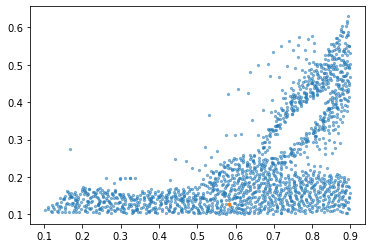

In [4]:

plt.scatter(most_recent_position[:,0], most_recent_position[:, 1], s=5, alpha=0.5)
plt.scatter(most_recent_position[5,0], most_recent_position[5, 1], s=8)

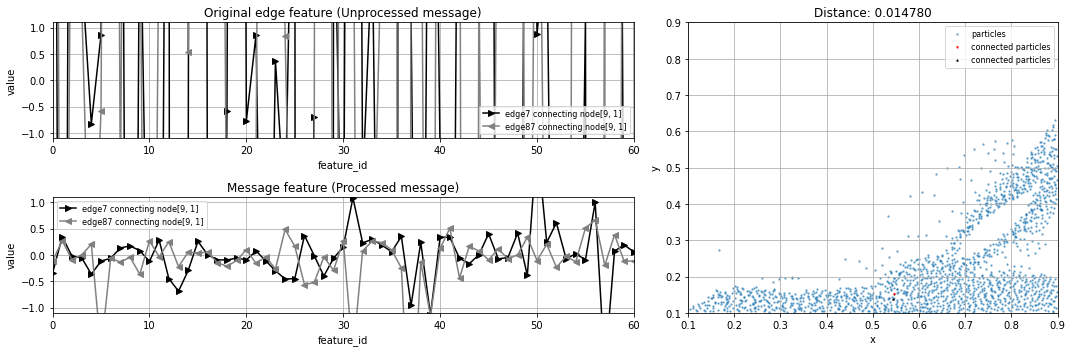

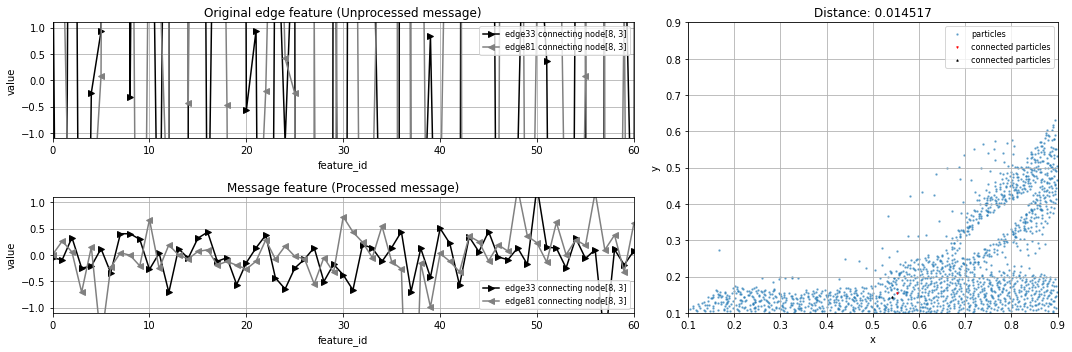

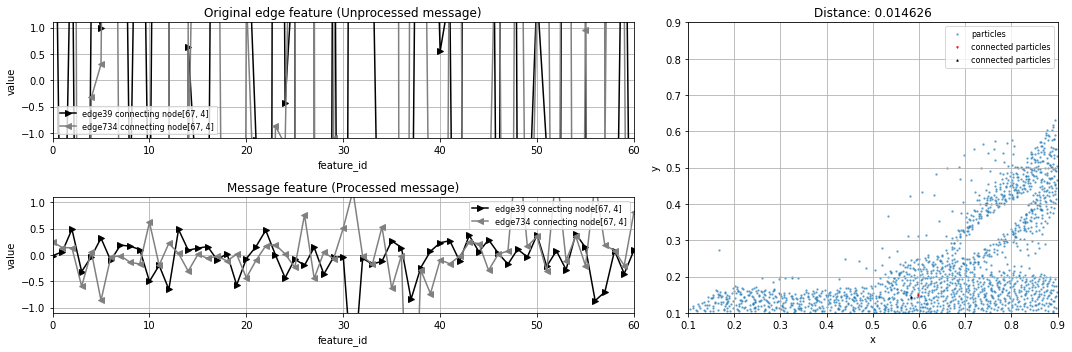

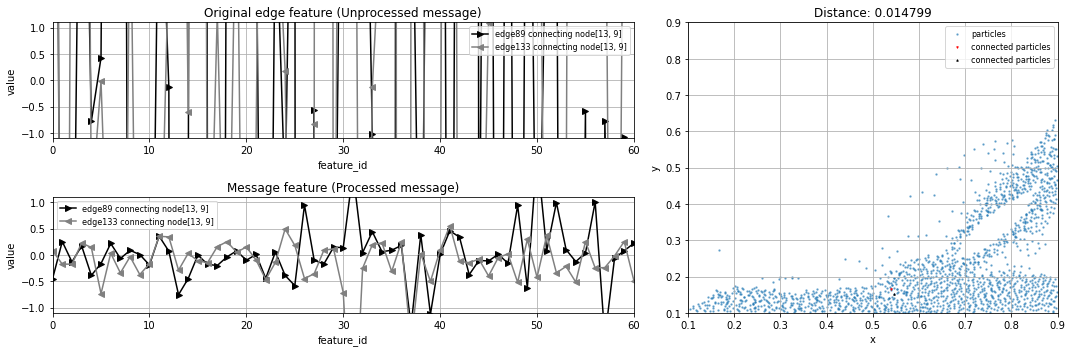

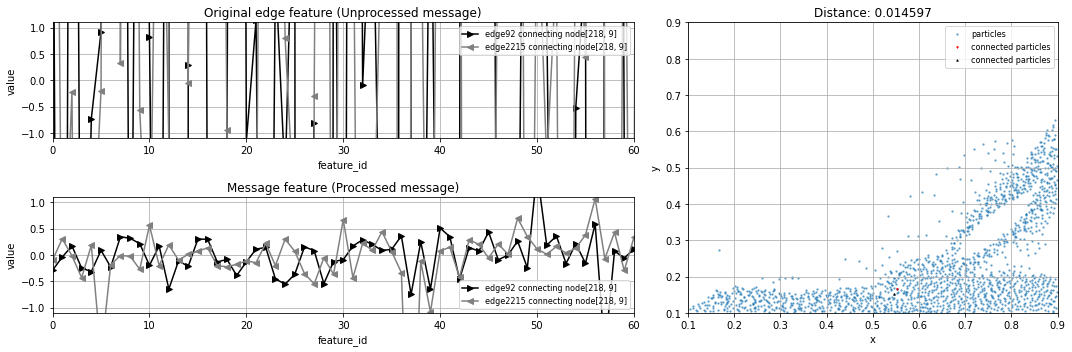

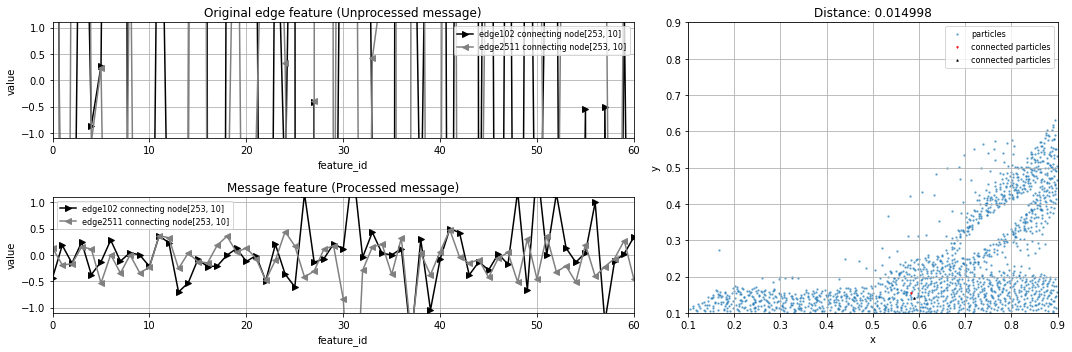

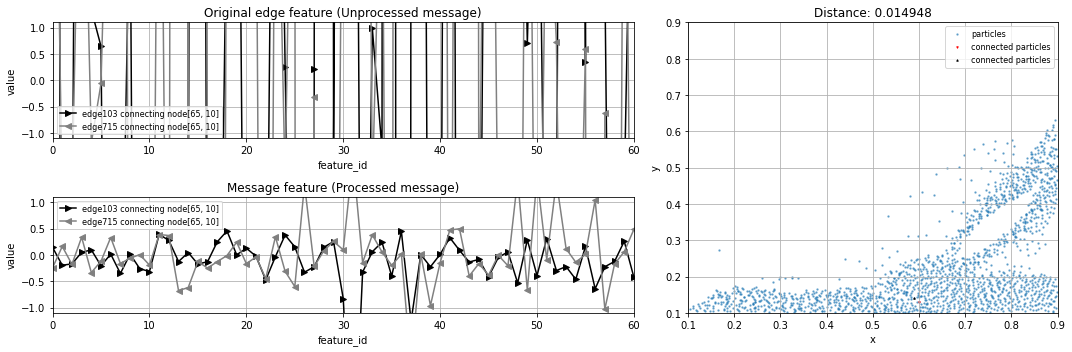

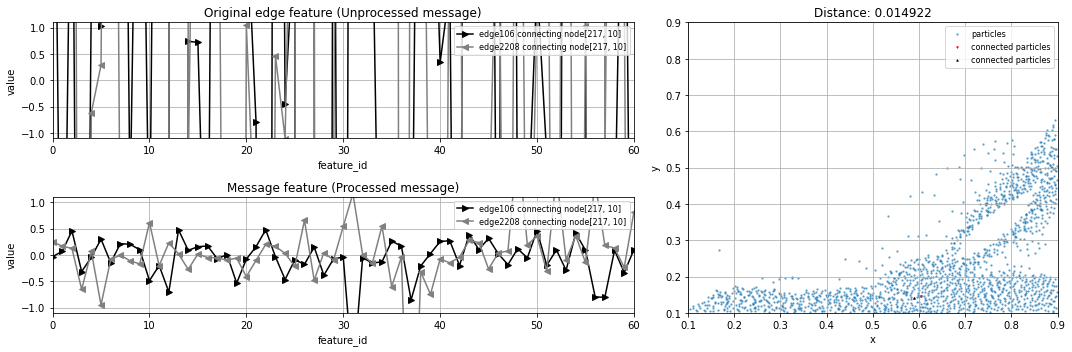

In [8]:
# inputs
n_investigate = 100

def annotate_axes(fig):
        for i, ax in enumerate(fig.axes):
                if i == 0 or 1:
                        ax.set_xlabel("feature_id")
                        ax.set_ylabel("value")
                        ax.set_xlim([0, 60])
                        ax.set_ylim([-1.1, 1.1])
                        ax.legend(prop={'size': 8})
                        ax.grid()

message_similarities = []
message_magnitudes = []
node_distances = []

for i in range(n_investigate):
        # get edge id connecting the same node pair (bidirectional edge)
        same_edge_ids = connectivity_indices[i][0]
        # get the node ids connected by the above edges
        connected_node_ids = connectivity_indices[i][1]

        # find messages corresponds to the above edges
        unprocessed_messages = edge_features_unprocessed[
                [same_edge_ids[0], same_edge_ids[1]]
        ]
        processed_messages = edge_features_processed[
                [same_edge_ids[0], same_edge_ids[1]]
        ]
        # calculate mse between two processed messages
        message_similarity = ((processed_messages[0] - processed_messages[1])**2).mean()
        message_similarities.append(message_similarity)
        # calculate sum of absolute values of messages
        message_magnitude = np.abs(processed_messages[0]).sum(), \
                            np.abs(processed_messages[1]).sum()
        message_magnitudes.append(message_magnitude)


        # find coordinates of node pairs corresponds to the above edges
        node_coords = most_recent_position[[connected_node_ids[0], connected_node_ids[1]]]
        distance = np.sqrt(np.sum((node_coords[0]-node_coords[1])**2))
        node_distances.append(distance)

        #################################################################################
        if distance > 0.0145:
                # plot
                fig = plt.figure(figsize=(15, 5))
                ax1 = plt.subplot2grid((2, 5), (0, 0), colspan=3)
                ax2 = plt.subplot2grid((2, 5), (1, 0), colspan=3)
                ax3 = plt.subplot2grid((2, 5), (0, 3), rowspan=2, colspan=2)

                ax1.plot(np.arange(128), unprocessed_messages[0],
                        label=f"edge{same_edge_ids[0]} connecting node{connected_node_ids}", marker=">", color="black")
                ax1.plot(np.arange(128), unprocessed_messages[1],
                        label=f"edge{same_edge_ids[1]} connecting node{connected_node_ids}", marker="<", color="gray")
                ax2.plot(np.arange(128), processed_messages[0],
                        label=f"edge{same_edge_ids[0]} connecting node{connected_node_ids}", marker=">", color="black")
                ax2.plot(np.arange(128), processed_messages[1],
                        label=f"edge{same_edge_ids[1]} connecting node{connected_node_ids}", marker="<", color="gray")
                ax3.scatter(most_recent_position[:, 0], most_recent_position[:, 1],
                            label="particles", s=2, alpha=0.5)
                # specify connected node pair
                markers = ['v', '^']
                colors = ["r", "k"]
                for j, node_coord in enumerate(node_coords):
                        ax3.scatter(node_coord[0], node_coord[1],
                                    marker=markers[j],
                                    color=colors[j],
                                    label="connected particles", s=2)

                annotate_axes(fig)
                ax1.set_title("Original edge feature (Unprocessed message)")
                ax2.set_title("Message feature (Processed message)")
                ax3.set_xlabel("x")
                ax3.set_ylabel("y")
                ax3.set_xlim([0.1, 0.9])
                ax3.set_ylim([0.1, 0.9])
                ax3.set_title(f"Distance: {distance:3f}")
                plt.tight_layout()
                fig.savefig(f"message_data/connection{i}.svg", format="svg")
                #################################################################################

Text(0, 0.5, 'MSE for message pair')

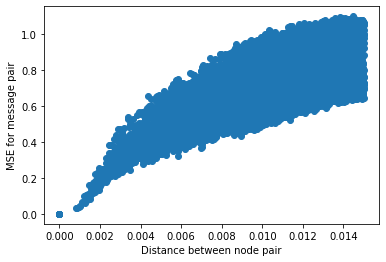

In [11]:
fig = plt.figure()
ax = plt.subplot(111)
ax.scatter(node_distances, message_similarities)
ax.set_xlabel("Distance between node pair")
ax.set_ylabel("MSE for message pair")

Text(0, 0.5, 'Sum of absolute message features')

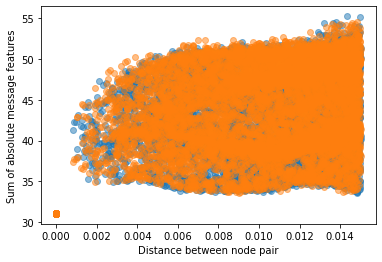

In [12]:
m_mag = np.array(message_magnitudes)
fig1 = plt.figure()
ax = plt.subplot(111)
ax.scatter(node_distances, np.array(message_magnitudes)[:, 0], alpha=0.5)
ax.scatter(node_distances, np.array(message_magnitudes)[:, 1], alpha=0.5)
ax.set_xlabel("Distance between node pair")
ax.set_ylabel("Sum of absolute message features")